# GANmut

In [2]:
! cd /../GANmut-main
! pip install -r /../requiremets.txt
! pip install --upgrade imutils

In [1]:
import sys
sys.path.append("..")
import numpy as np
from utils.notebook_utils import GANmut

# Final algorithm for emotions to coordinates

Device: cpu
(0.76, -0.24)


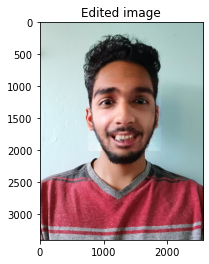

In [53]:
emotion_manip("../images/taran.jpg", "happy", "surprise", 0.8)

In [43]:
#neutral cannot be a primary emotion
def emotion_manip(img_path, primary_emotion, secondary_emotion=None, intensity=None):
    if (primary_emotion == "happy"):
        neighbors = {"neutral": (0.4, -0.5), "surprise" : (0.8, -0.4)}
        happy_emote = emotion((0.6,0.4) , neighbors)
        if secondary_emotion is not None:
            happy_emote.emotion_man(img_path, secondary_emotion, intensity)
        else:
            happy_emote.emotion_man(img_path)              
    elif (primary_emotion == 'sad'):
        neighbors = {"neutral": (-0.7, -0.3), "disgust" : (-0.8, -1), "fear": (-0.4, -1)}
        sad_emote = emotion((1,-0.7) ,neighbors)
        if secondary_emotion is not None:
            sad_emote.emotion_man(img_path, secondary_emotion, intensity)
        else:
            sad_emote.emotion_man(img_path=img_path)     
    elif (primary_emotion == 'angry'):
        neighbors = {"surprise": (1, -0.4), "neutral" : (0.4, -0.4), "fear": (-0.3, -0.9), "sad" : (-0.4, -0.6)}
        angry_emote = emotion((0.6,-0.9) , neighbors)
        if secondary_emotion is not None:
            angry_emote.emotion_man(img_path, secondary_emotion, intensity)
        else:
            angry_emote.emotion_man(img_path)          
    elif (primary_emotion == 'fear'):
        neighbors = {"sad": (-0.4, -0.6), "disgust" : (-0.8, -1), "angry": (0.5,-0.9)}
        fear_emote = emotion((-0.25,-0.9) , neighbors)
        if secondary_emotion is not None:
            fear_emote.emotion_man(img_path, secondary_emotion, intensity)
        else:
            fear_emote.emotion_man(img_path)                   
    elif (primary_emotion == 'surprise'):
        neighbors = {"happy": (0.8, -0.1), "neutral" : (0.6, -0.5), "angry": (0.9, -0.8)}
        surprise_emote = emotion((0.9,-0.45) , neighbors)
        if secondary_emotion is not None:
            surprise_emote.emotion_man(img_path, secondary_emotion, intensity)
        else:
            suprise_emote.emotion_man(img_path)          
    elif (primary_emotion == 'neutral'):
        neutral_emote = emotion(coordinates=(0.4, -0.5))
        neutral_emote.emotion_main(img_path)
    elif (primary_emotion == 'disgust'):
        neighbors = {"sad": (-0.8, -0.75), "fear" : (-0.1, -1)}
        disgust_emote = emotion((-0.8,-1) , neighbors)
        if secondary_emotion is not None:
            disgust_emote.emotion_man(img_path, secondary_emotion, intensity)
        else:
            disgust_emote.emotion_man(img_path)          
    else:
        print("This is not a valid emotion")

In [50]:
#need to add intensity for singular emotions

class emotion: 
    #neighbors is a dictionary with key as emotion and value as tuple for center of emotion space
    #coordinates is tuples
    def __init__(self, coordinate, neighbors=None):
        self.coordinate = coordinate
        if neighbors is not None:
            self.neighbors = neighbors
        self.G = GANmut(G_path='../learned_generators/gaus_2d/1800000-G.ckpt',model='gaussian')
    #for intensity 1.00 means purely secondary, 0.00 means purely primary
    def emotion_man(self, img_path, second_emote=None, intensity = None): 
        if second_emote is not None:
            if second_emote in self.neighbors:
                secondary_coordinate = self.neighbors[second_emote]
                x_dist = abs((self.coordinate[0] - secondary_coordinate[0]) * intensity)
                y_dist = abs((self.coordinate[1] - secondary_coordinate[1]) * intensity)
                x_dist = round(x_dist, 2)
                y_dist = round(y_dist, 2)
                if(self.coordinate[0] > secondary_coordinate[0]):
                    x_dist *= -1
                if(self.coordinate[1] > secondary_coordinate[1]):
                    y_dist *= -1
                
                new_coordinate = (self.coordinate[0] + x_dist, self.coordinate[1] + y_dist)
                ##delete line
                print(new_coordinate)
                ##delete above line
                self.G.emotion_edit(img_path=img_path, x=new_coordinate[0], y=new_coordinate[1], save = False)
            else: 
                print("Not an emotion that can be added with ")
        else:
            self.G.emotion_edit(img_path=img_path, x=self.coordinate[0], y=self.coordinate[1], save = False)

            

In [2]:
#map resolution is the step size we should take in the x and y direction for each new image creation'
def create_set(img_path, map_step, gaussian=True):
    if(gaussian == True):
        G = GANmut(G_path='../learned_generators/gaus_2d/1800000-G.ckpt',model='gaussian')
        i =-1
        j = 1
        count = 0
        while(i <= 1):
            while(j >= -1):
                G.emotion_edit(img_path= img_path, x = i, y = j, save = True )
                j = round(j - map_step, 2)
            j = 1
            i = round(i + map_step, 2)
        print("all images saved")
    else:
        G = GANmut(G_path='../learned_generators/lin_2d/1000000-G.ckpt',model='linear')
        rho = 0.9
        theta = 0 
        for i in range(360//map_step):
            G.emotion_edit(img_path =img_path, theta=theta, rho=rho, save=True)
            theta += map_step
        print("all images saved")
        
create_set('../images/ritesh.jpg', 2, gaussian=False)

Device: cpu
edited image saved in ../edited_images_linear/theta_0.00_rho_0.90ritesh.jpg
edited image saved in ../edited_images_linear/theta_2.00_rho_0.90ritesh.jpg
edited image saved in ../edited_images_linear/theta_4.00_rho_0.90ritesh.jpg
edited image saved in ../edited_images_linear/theta_6.00_rho_0.90ritesh.jpg
edited image saved in ../edited_images_linear/theta_8.00_rho_0.90ritesh.jpg
edited image saved in ../edited_images_linear/theta_10.00_rho_0.90ritesh.jpg
edited image saved in ../edited_images_linear/theta_12.00_rho_0.90ritesh.jpg
edited image saved in ../edited_images_linear/theta_14.00_rho_0.90ritesh.jpg
edited image saved in ../edited_images_linear/theta_16.00_rho_0.90ritesh.jpg
edited image saved in ../edited_images_linear/theta_18.00_rho_0.90ritesh.jpg
edited image saved in ../edited_images_linear/theta_20.00_rho_0.90ritesh.jpg
edited image saved in ../edited_images_linear/theta_22.00_rho_0.90ritesh.jpg
edited image saved in ../edited_images_linear/theta_24.00_rho_0.90rit

edited image saved in ../edited_images_linear/theta_212.00_rho_0.90ritesh.jpg
edited image saved in ../edited_images_linear/theta_214.00_rho_0.90ritesh.jpg
edited image saved in ../edited_images_linear/theta_216.00_rho_0.90ritesh.jpg
edited image saved in ../edited_images_linear/theta_218.00_rho_0.90ritesh.jpg
edited image saved in ../edited_images_linear/theta_220.00_rho_0.90ritesh.jpg
edited image saved in ../edited_images_linear/theta_222.00_rho_0.90ritesh.jpg
edited image saved in ../edited_images_linear/theta_224.00_rho_0.90ritesh.jpg
edited image saved in ../edited_images_linear/theta_226.00_rho_0.90ritesh.jpg
edited image saved in ../edited_images_linear/theta_228.00_rho_0.90ritesh.jpg
edited image saved in ../edited_images_linear/theta_230.00_rho_0.90ritesh.jpg
edited image saved in ../edited_images_linear/theta_232.00_rho_0.90ritesh.jpg
edited image saved in ../edited_images_linear/theta_234.00_rho_0.90ritesh.jpg
edited image saved in ../edited_images_linear/theta_236.00_rho_0